In [1]:
from src.modules.fullDose import *
from src.main import *

a = FullDoseDT()


In [2]:
print(len(a.train_data), len(a.test_data), len(a.validate_data), len(a.data))


747 248 249 1244


In [3]:
a.train()


In [4]:
print(len(a.decision_list))


241


In [5]:
a.test()


决策树的正确率： 93.14516129032258 %


In [6]:
a.test()
a.test(a.validate_data)


决策树的正确率： 93.14516129032258 %
决策树的正确率： 91.16465863453816 %


In [7]:
len(a.decision_list)
complete_tree = pd.DataFrame(a.decision_list)
write_to_excel(complete_tree, 'excel/t4.1_complete_tree.xlsx')


In [8]:
a.cut()


In [9]:
print(len(a.decision_list))
a.test()
a.test(a.validate_data)


56
决策树的正确率： 91.12903225806451 %
决策树的正确率： 92.3694779116466 %


In [10]:
import pandas as pd


In [11]:
cut_tree = pd.DataFrame(a.decision_list)
write_to_excel(cut_tree, 'excel/t4.2_cut_tree.xlsx')


In [12]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

y = count / 56


In [13]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

ys = count / 56

print(ys)


[1.         0.85714286 0.78571429 0.10714286 0.21428571]


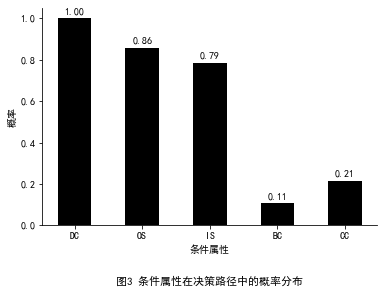

In [14]:
fig, axes = plt.subplots()
xs = list(Ps.keys())
axes.bar(xs, ys, width=0.5, color="k")
axes.spines[['right', 'top']].set_visible(False)
for x, y in zip(xs, ys):
    plt.text(x, y+0.02, '%.2f' % y, ha="center")

axes.set_ylabel('概率')
axes.set_xlabel('条件属性')

plt.title('图3 条件属性在决策路径中的概率分布', y=-0.3, size=11)
plt.savefig('c3.svg', format="svg", bbox_inches="tight")
plt.show()


In [15]:
Ps = [0 for _ in range(len(a.decision_list))]


In [16]:
for node in a.test_data:
    for i, path in enumerate(a.decision_list):
        is_hit = True
        for attr, v in path.items():
            if attr == 'label':
                continue
            if v != node[attr]:
                is_hit = False
                # break
        if(is_hit):
            Ps[i] += 1
            # break


In [17]:
len(a.test_data)

248

In [18]:
cluster = [[] for _ in range(0, 6)]
for i, path in enumerate(a.decision_list):
    cluster[path['label'] - 1].append(Ps[i])

group_count = [len(g) for g in cluster]

group_count


[1, 3, 5, 11, 21, 15]

In [19]:
cluster = [ [count for count in label if count > 0] for label in cluster ]

total = sum([ sum(g) for g in cluster])

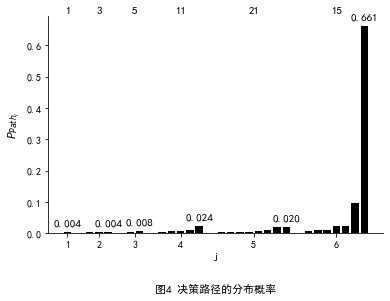

In [36]:
fig, axes = plt.subplots()

x_offset = 0
width = 0.8
group_gap = 2

x_ticks = []

max_y = 0

for i, group in enumerate(cluster):
    xs = np.arange(0, len(group)) + x_offset + width / 2 + group_gap
    ys = [count / total for count in sorted(group)]
    x_offset = xs[-1]

    tick = (xs[-1] + xs[0]) / 2
    x_ticks.append(tick)

    axes.text(xs[-1], ys[-1] + 0.02, '%.3f' % ys[-1], ha="center", fontsize=11)

    if ys[-1] > max_y:
        max_y = ys[-1]

    axes.bar(xs, ys, width=0.8, color="k")

for i, count in enumerate(group_count):
    axes.text(x_ticks[i], max_y + 0.04, count, ha="center", fontsize=11)

axes.set_xticks(x_ticks)
axes.set_xticklabels([1, 2, 3, 4, 5, 6])

axes.set_ylabel(r'$P_{Path_l}$', size=11)
axes.set_xlabel(r'j', size=11)

plt.title('图4 决策路径的分布概率', y=-0.3, size=11)


axes.spines[['top', 'right']].set_visible(False)

plt.savefig('c4.svg', format="svg", bbox_inches="tight")
